## Студент группы ИУ5-61Б, Ашуров Г.В.  Вариант 1
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
import numpy as np

In [2]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data.shape

(150, 4)

### Первые 5 строк

In [3]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
print(data.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [5]:
data.loc[0, 'sepal length (cm)'] = np.nan

# Удаление строк с пропусками
data.dropna(inplace=True)

###Построим корреляционную матрицу

In [7]:
data['is_long_iris'] = np.where(data['sepal length (cm)'] > 5, 1, 0)
data.corr()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),is_long_iris
sepal length (cm),1.000000,-0.112106,0.871281,0.816961,0.671808
sepal width (cm),-0.112106,1.000000,-0.423302,-0.360480,-0.043662
petal length (cm),0.871281,-0.423302,1.000000,0.962423,0.617184
petal width (cm),0.816961,-0.360480,0.962423,1.000000,0.597245
is_long_iris,0.671808,-0.043662,0.617184,0.597245,1.000000


Значение целевого признака (is_long_iris) варьируется от 0 до 1.

Проведем корреляцинный анализ по отношению к целевому признаку
Наиболее коррелируемые признаки: sepal_length(0.67) и petal_legth(0.62) - их стоит оставить в модели

Менее коррелируемый признак : petal_width(0.6) - его также стоит оставить в модели

Наименее коррелируемый с целевым признаком: petal_length(-0.04) - можно не учитывать в модели.

###Тепловая карта
В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен.

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn

Буду строить корреляционную матрицу 3 способами: на основе коэффициентов корреляции Пирсона, Кендалла и Спирмена.

### Пирсон

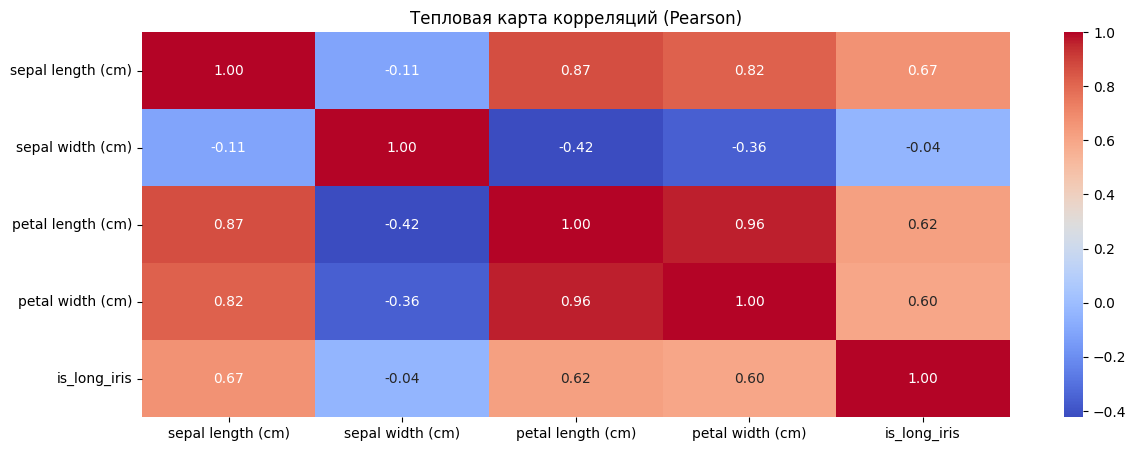

In [14]:
pearson_corr = data.corr(method='pearson')

plt.figure(figsize=(14, 5))
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Тепловая карта корреляций (Pearson)')
plt.show()

###Кендалл

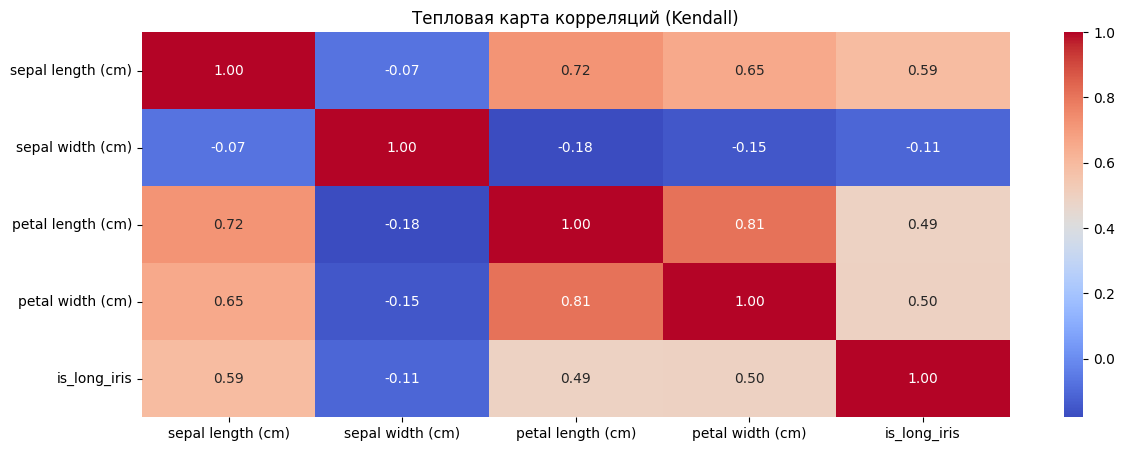

In [15]:
kendall_corr = data.corr(method='kendall')

plt.figure(figsize=(14, 5))
sns.heatmap(kendall_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Тепловая карта корреляций (Kendall)')
plt.show()


###Спирмен

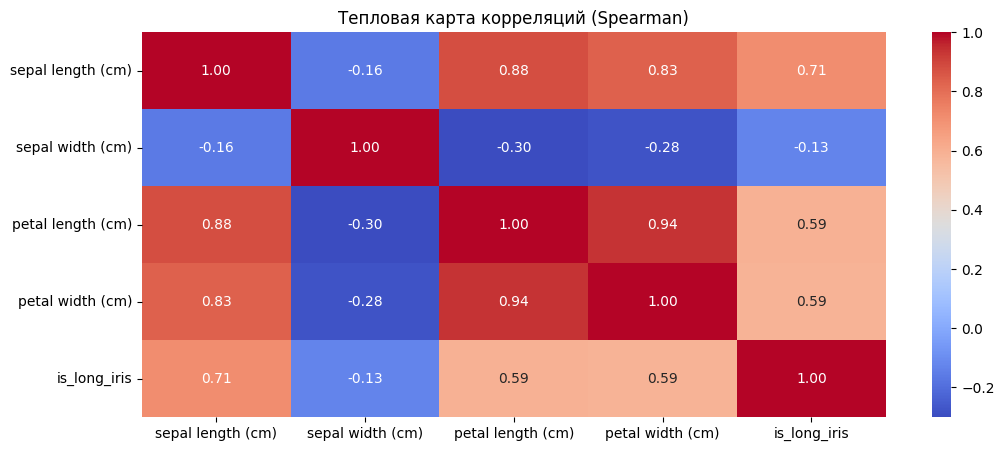

In [17]:
spearman_corr = data.corr(method='spearman')

plt.figure(figsize=(14, 5))
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Тепловая карта корреляций (Spearman)')
plt.show()

## Задание по варианту группы ИУ5-61Б
Для студентов групп ИУ5-61Б, ИУ5Ц-81Б - для пары произвольных колонок данных построить график "Диаграмма рассеяния".

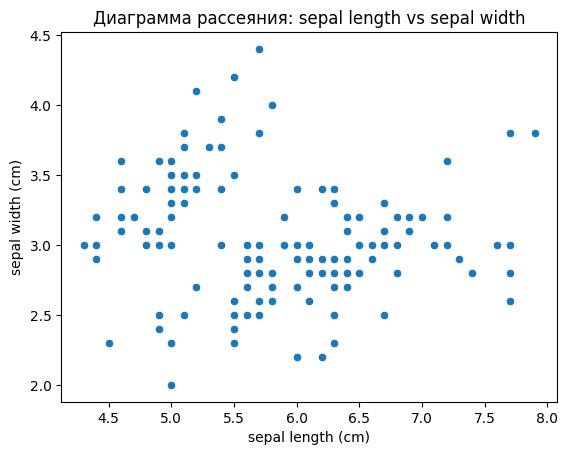

In [18]:
# Построение диаграммы рассеяния для колонок "sepal length (cm)" и "sepal width (cm)"
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=data)
plt.title('Диаграмма рассеяния: sepal_length and sepal_width')
plt.show()